In [38]:
from os import chdir,walk,getcwd
from datetime import datetime
import pandas as pd
import pickle
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from progiter import ProgIter
from mymodule import get_similarity
import matplotlib

sns.set_style("white")
sns.set_context("talk")


In [50]:

# Say, "the default sans-serif font is 
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

In [45]:
# get month when the files was created. We need the ones from december
working_dir = '/tf/notebooks/code_for_pub/fp_files'

# change dir
chdir(working_dir)

# list files
files = next(walk(getcwd()))[2]
files = [x for x in files if ('csv' not in x)]

time_of_change = dict()
for x in files:
    mtime = pathlib.Path(x).stat()
    time_of_change[x] = datetime.fromtimestamp(mtime.st_mtime).month
    
# pick those created in december & not hungabunga one
files = sorted([x for x in time_of_change.keys() if \
                ((time_of_change[x] == 12) | (time_of_change[x] == 10)) & \
                ('npy' not in x) & ('VAE_16bit.' not in x) & \
                ('VAE_256bit.' not in x) & ('er_1024bit.' not in x) & \
                ('er_64bit.' not in x) & ('gae_64bit.' not in x)  & \
                ('infomax.pi' not in x)
               ]) 

In [46]:
files

['fps_VAE_16bit_new.pickle',
 'fps_VAE_256bit_new.pickle',
 'fps_e3fp_1024bit.pickle',
 'fps_gae_64bit_new.pickle',
 'fps_infomax_new.pickle',
 'fps_morgan_1024bit.pickle',
 'fps_morgan_300bit.pickle',
 'fps_topo_1024bit.pickle',
 'fps_topo_300bit.pickle',
 'fps_transformer_1024bit_new.pickle',
 'fps_transformer_64bit_new.pickle']

In [47]:
names = []
for f in files:
    names.append(f[4:-7].lower().replace('_new','').replace('_',' '))
holder = pd.DataFrame(index=names, columns=names, dtype=float)

In [48]:
for ind_i, file_i in ProgIter(enumerate(files), total=len(names), show_times=False):
    for ind_j, file_j in enumerate(files):
        
        with open(file_i, 'rb') as f:
            i = pickle.load(f)
            if i.dtypes.unique() not in ['float64']:
                i = i.astype('float64')
        with open(file_j, 'rb') as f:
            j = pickle.load(f)
            if j.dtypes.unique() not in ['float64']:
                j = j.astype('float64')

        cka_from_examples_debiased1 = get_similarity.feature_space_linear_cka(i.values, j.values, debiased=True)
        holder.iloc[ind_i,ind_j] = cka_from_examples_debiased1

 11/11... 


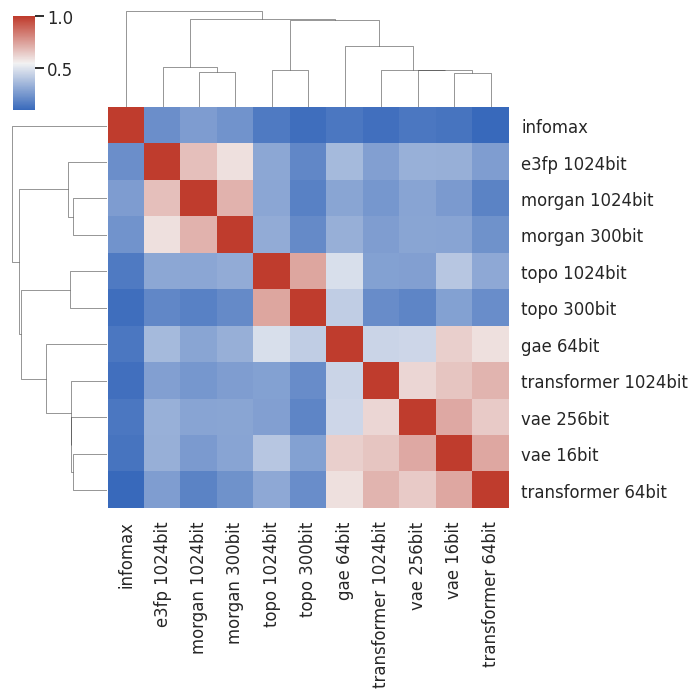

In [61]:
g = sns.clustermap(holder, 
                   method='median', # average, weighted, single, complete, ward, centroid, median
                   colors_ratio=0.05, 
                   dendrogram_ratio=0.2,
                   cbar_pos= (0.035, 0.83, 0.03, 0.13), #  (left, bottom, width, height),
                   cmap=sns.diverging_palette(255, 15, s=80, l=45, sep=1, as_cmap=True))

g.ax_heatmap.tick_params(right=False, bottom=False)
g.savefig('/tf/notebooks/code_for_pub/FIGURES/heatmap_CKA.png', dpi=400)
#g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=75)


In [60]:
!pwd

/tf/notebooks/code_for_pub/fp_files
